In [12]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [16]:
#lOAD AND SPLIT THE MNIST DATASET
(X_train,y_train),(X_test,y_test)=mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 64s 6us/step


In [17]:
#EXPLORATORY DATA ANALYSIS
print(X_train.shape)

(60000, 28, 28)


In [18]:
print(X_test.shape)

(10000, 28, 28)


In [19]:
print(y_train.shape)

(60000,)


In [20]:
#Taking a look at the first image in the data
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

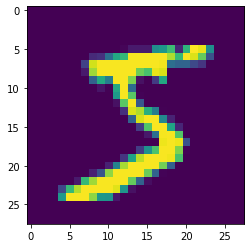

In [21]:
#IMAGE OF THE FIRST ELEMENT OF THE TRAINING DATASET
plt.imshow(X_train[0])

In [22]:
y_train[0]

5

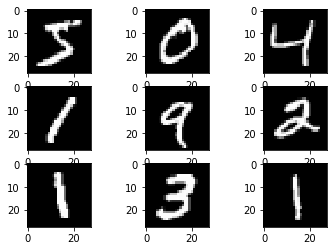

In [26]:
#IMAGE OF THE FIRST NINE-ELEMENTS OF THE TRAINING DATASET
for i in range(9):
 plt.subplot(330+1+i)   
 plt.imshow(X_train[i],cmap='gray')
plt.show()

In [27]:
#SHUFFLING THE DATASET
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

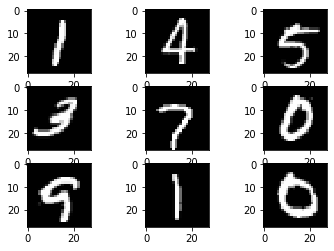

In [28]:
#IMAGE OF THE FIRST NINE-ELEMENTS OF THE TRAINING DATASET
for i in range(9):
 plt.subplot(330+1+i)   
 plt.imshow(X_train[i],cmap='gray')
plt.show()

In [29]:
#ONE HOT ENCODE:There are 10 classses and that classes are represented as unique integers.A one hot encoding is used to transform 
#the integer into a 10 element binary vector with a 1 for the index of the class value,and 0 valuesfor all other classes
trainY=to_categorical(y_train)
testY=to_categorical(y_test)

In [31]:
#PRINTING THE NEW LABEL
print(trainY[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
#RESHAPING THE DATA ARRAYS TO HAVE A SINGLE COLOR CHANNEL
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [32]:
#NORMALISE THE DATASET:Rescaling the pixel values of the grayscale images in the range [0,1]
X_train=X_train/255.0
X_test=X_test/255.0

In [33]:
#BUILDING THE CNN ARCHITECTURE
#The first layer is a convolutional layer with a filter size(3,3) and 64 filters.
#The second layer is a convolutional layer with a filter size (3,3) and 32 filters
#The filter maps are then flattened to provide features to the classifier
#In this problem,we will require an output layer with 10 nodes in order to predict the probability distribution of an image 
#belonging to each of the 10 classes
model=Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


In [34]:
#COMPILE THE MODEL
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
#TRAIN THE MODEL
#batch_size by default is 32
trn=model.fit(X_train,trainY,validation_data=(X_test,testY),epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0217 - acc: 0.9933 - val_loss: 0.0438 - val_acc: 0.9868
Epoch 2/3
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0153 - acc: 0.9952 - val_loss: 0.0510 - val_acc: 0.9866
Epoch 3/3
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0117 - acc: 0.9961 - val_loss: 0.0537 - val_acc: 0.9876


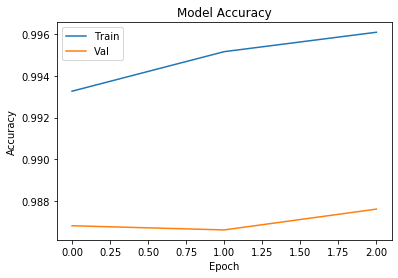

In [38]:
#visualize the model accuracy
plt.plot(trn.history['acc'])
plt.plot(trn.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [49]:
#predicting the probabilities of first 10 test_images
predictions=model.predict(X_test[:10])

In [50]:
print(np.argmax(predictions,axis=1))

[7 2 1 0 4 1 4 9 5 9]


In [51]:
print(testY[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
